##07_SVM

## Linear SVM

###1. 데이터셋 불러오기

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis = 1) #'specie'열을 drop하고 특성변수 X를 정의한다
y = iris['species'] #'species'열을 label y로 정의한다

###2. 카테고리 실수화

In [2]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) #'specie'열의 문자열을 범주형으로 전환하기

###3. 데이터 분할

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

###4. 입력 데이터 표준화

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###5. 모델 추정: Linear SVM

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)

y_train_pred = svm.predict(X_train_std) 
y_test_pred = svm.predict(X_test_std)

In [6]:
print(svm.support_) # Indice of support vectors
print(svm.n_support_) # Number of support vectors for each class

[ 43 101   8  23  33  42  58  76  79  82  85   5  19  27  32  41  45  60
  72  95]
[2 9 9]


###6. 결과 분석

In [7]:
# 정확도 계산
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9333333333333333


In [8]:
# 혼합 행렬 -> 오분류표 작성
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


In [9]:
# 정확도(accuracy), 정밀도(precision), 재현율(recall), F1 평가 지표
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



##Nonlinear SVM

###1. 데이터셋 불러오기

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis = 1) #'specie'열을 drop하고 특성변수 X를 정의한다
y = iris['species'] #'species'열을 label y로 정의한다

###2. 카테고리 실수화

In [11]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) #'specie'열의 문자열을 범주형으로 전환하기

###3. 데이터 분할

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

###4. 입력 데이터 표준화

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###5. 모델 추정: Nonlinear SVM

In [14]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', C = 1.0, gamma = 0.2, random_state = 42)
ksvm.fit(X_train_std, y_train)

y_train_pred = ksvm.predict(X_train_std)
y_test_pred = ksvm.predict(X_test_std)

In [15]:
print(ksvm.support_) # Indice of support vectors
print(ksvm.n_support_) # Number of support vectors for each class

[ 16  43  50  61  99 101   0   8  23  33  34  42  48  54  56  58  69  76
  79  82  83  85  89  96 100   5  10  19  22  27  30  32  41  45  60  67
  72  80  81  95 104]
[ 6 19 16]


###6. 결과 분석

In [16]:
# 정확도 계산
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9555555555555556


In [17]:
# 혼합 행렬 -> 오분류표 작성
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


In [18]:
# 정확도(accuracy), 정밀도(precision), 재현율(recall), F1 평가 지표
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



###plus. Nonlinear SVM 이해하기

평면 상의 자료 표현

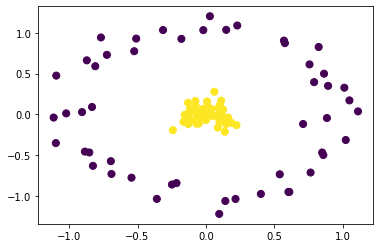

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 100, noise = 0.1, factor = 0.1)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)

3차원 공간 상의 자료 표현

In [20]:
import numpy as np
r = np.exp(-(X**2).sum(1))
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
def plot_3D(elev = 30, azim = 30, X= X, y = y):
  ax = plt.subplot(projection = '3d')
  ax.scatter3D(X[:,0], X[:,1], r, c = y, s = 50, cmap = 'autumn')
  ax.view_init(azim = 50, elev = 30)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
interact(plot_3D, elev = [-90, 90], azip = (-180, 180), X = fixed(X), y = fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D>

##얼굴인식(Face Recognition) 예제

###1. 데이터셋 불러오기

In [21]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
n_samples, h, w = faces.images.shape

X = faces.data
y = faces.target

In [22]:
print(faces.target_names) # 얼굴인식 Label 이름
print(faces.images.shape)
print(faces.target_names.shape[0]) # Label 종류의 총 개수

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)
7


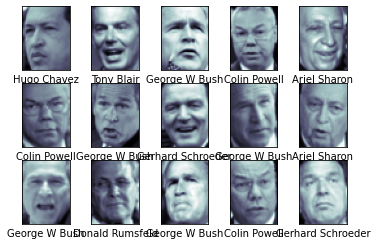

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap = 'bone')
  axi.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

###3. 데이터 분할

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

###4. 데이터 압축
- 주성분 분석을 이용해 150개의 특성변수에 대한 차원 축소

In [25]:
from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(X_train)
eigenfaces = pca.components_.reshape(n_components, h, w)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

###5. 모델 추정: Kernel SVM & GridSearchCV

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 커널 SVM: kernel = 'rbf'
# 'rdf'의 gamma와 C를 찾기 위해 GridSearchCV 모듈 사용하기 
ksvm = SVC(kernel = 'rbf', class_weight = 'balanced')
param_grid={'C':[1e3,5e3,1e4,5e4,1e5], 'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
clf = GridSearchCV(ksvm, param_grid, cv = 5)
clf.fit(X_train_pca,y_train)

y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

In [27]:
#추정 파라미터
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.005}
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


###6. 결과 분석

In [28]:
# 정확도 계산
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

1.0
0.8509316770186336


In [30]:
# 정확도(accuracy), 정밀도(precision), 재현율(recall), F1 평가 지표
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.62      0.70        13
     Colin Powell       0.80      0.87      0.83        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.96      0.72      0.83        36

         accuracy                           0.85       322
        macro avg       0.90      0.74      0.80       322
     weighted avg       0.86      0.85      0.85       322



In [32]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred, labels = range(faces.target_names.shape[0])))

[[  8   1   0   4   0   0   0]
 [  1  52   0   7   0   0   0]
 [  0   3  17   7   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   3   0   3   1   8   0]
 [  1   2   1   6   0   0  26]]
